In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 5s 1us/step


In [11]:
len(X_train)

60000

In [12]:
len(X_test)

10000

In [13]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

In [ ]:
plt.matshow(X_train[0])

In [17]:
y_train[0]

9

In [18]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

In [20]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [22]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

In [41]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6034 - accuracy: 0.7970
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4609 - accuracy: 0.8431
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4361 - accuracy: 0.8504
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4227 - accuracy: 0.8544
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4129 - accuracy: 0.8569


In [42]:

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.8457


[0.44784945249557495, 0.8457000255584717]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

In [48]:
np.argmax(y_predicted[0])

9

In [56]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

In [ ]:
cm = tf.math.confusion_matrix(labels= y_test, predictions =y_predicted_labels)
cm

Text(95.72222222222221, 0.5, 'Truth')

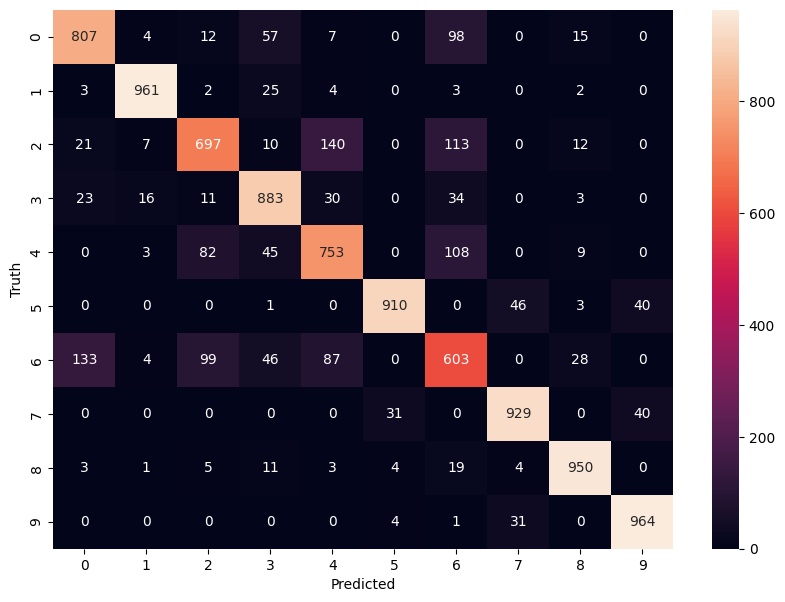

In [63]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [68]:
model = keras.Sequential([keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                          keras.layers.Dense(10,activation= 'sigmoid')])
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5040 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3776 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3371 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3162 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2951 - accuracy: 0.8916


In [70]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3654 - accuracy: 0.8696


[0.36543792486190796, 0.8695999979972839]

In [73]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions =y_predicted_labels)

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

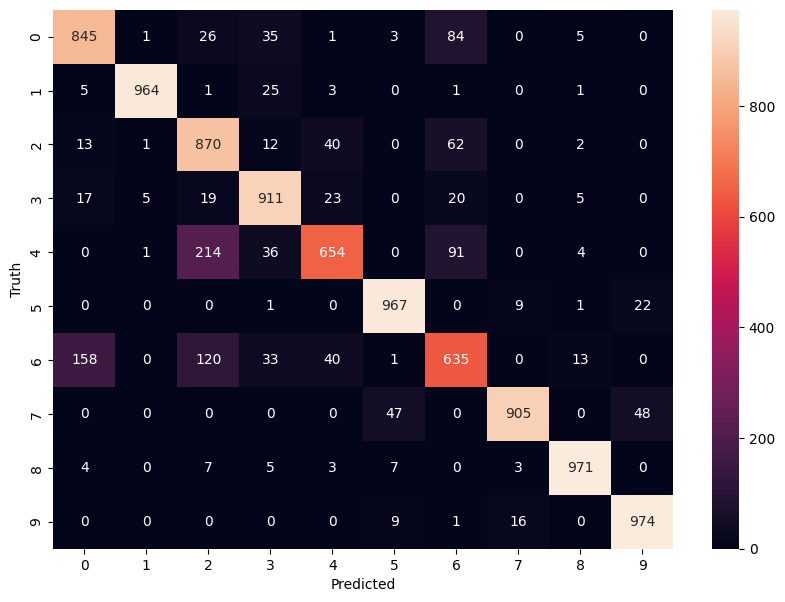

In [76]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [81]:
model = keras.Sequential([keras.layers.Flatten(input_shape =(28,28)),
                          keras.layers.Dense(100,activation ='relu'),
                          keras.layers.Dense(10, activation= 'sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train, y_train, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5086 - accuracy: 0.8216
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3829 - accuracy: 0.8611
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3431 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3171 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2970 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2843 - accuracy: 0.8945
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2716 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2624 - accuracy: 0.9016
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2533 - accuracy: 0.9051
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2

In [82]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8767


[0.3425823152065277, 0.8766999840736389]